<a href="https://colab.research.google.com/github/alisyakainth/MRIwithGANs/blob/master/GANs_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()
loaded=0

for fn in uploaded.keys():
  loaded+=1

print('Uploaded',loaded,'files')

Saving Y1 - Copy.JPG to Y1 - Copy.JPG
Saving Y1.JPG to Y1.JPG
Saving Y2 - Copy.JPG to Y2 - Copy.JPG
Saving Y2.JPG to Y2.JPG
Saving Y3 - Copy.JPG to Y3 - Copy.JPG
Saving Y3.JPG to Y3.JPG
Saving Y4 - Copy.JPG to Y4 - Copy.JPG
Saving Y4.JPG to Y4.JPG
Saving Y5 - Copy.JPG to Y5 - Copy.JPG
Saving Y5.JPG to Y5.JPG
Saving Y6 - Copy.JPG to Y6 - Copy.JPG
Saving Y6.JPG to Y6.JPG
Saving Y7 - Copy.JPG to Y7 - Copy.JPG
Saving Y7.JPG to Y7.JPG
Saving Y8 - Copy.JPG to Y8 - Copy.JPG
Saving Y8.JPG to Y8.JPG
Saving Y9 - Copy.JPG to Y9 - Copy.JPG
Saving Y9.JPG to Y9.JPG
Saving Y10 - Copy.JPG to Y10 - Copy.JPG
Saving Y10.JPG to Y10.JPG
Saving Y11 - Copy.JPG to Y11 - Copy.JPG
Saving Y11.JPG to Y11.JPG
Saving Y12 - Copy.JPG to Y12 - Copy.JPG
Saving Y12.JPG to Y12.JPG
Saving Y13 - Copy.JPG to Y13 - Copy.JPG
Saving Y13.JPG to Y13.JPG
Saving Y14 - Copy.JPG to Y14 - Copy.JPG
Saving Y14.JPG to Y14.JPG
Saving Y15 - Copy.JPG to Y15 - Copy.JPG
Saving Y15.JPG to Y15.JPG
Saving Y16 - Copy.JPG to Y16 - Copy.JPG
Saving

In [0]:
import torch
import torchvision 
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets 
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable 
import os
from scipy import misc
import skimage.color as ski
import matplotlib.pyplot as plt
import numpy as np
import cv2


def to_var(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

# Image processing 
transform = transforms.Compose([
                transforms.ToTensor(),    
                transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                transforms.Grayscale(1),
                transforms.Resize(size=100)])


           

In [0]:
img_array = []
path = os.path.abspath('/content')

for i in range(1,17):
  try:
    img_array.append(misc.imread(os.path.join(path,'Y'+str(i-1)+'.JPG')))
  except:
    pass
for i in range(1,17):
  try:
    img_array.append(misc.imread(os.path.join(path,'Y'+str(i-1)+' - Copy.JPG')))
  except:
    pass

for i in range(0,30):
  img = ski.rgb2gray(img_array[i])
  img = np.array(img)
  img = cv2.resize(img,(100,100))
  img = torch.tensor(img)
  
  img = img.flatten()
  img = img.float()
  img_array[i] = img

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
data_loader = torch.utils.data.DataLoader(img_array, batch_size=16, shuffle=True)

D = nn.Sequential(
    
    nn.Linear(10000, 16),
    
    nn.LeakyReLU(0.3),
    
    nn.Linear(16, 16),
    
    nn.LeakyReLU(0.2),
    
    nn.Linear(16, 1),
    
    nn.Sigmoid())

# Generator 
G = nn.Sequential(
    
    nn.Linear(1, 16),
    
    nn.LeakyReLU(0.2),
    
    nn.Linear(16, 16),
    
    nn.LeakyReLU(0.2),
    
    nn.Linear(16, 10000),
    
    nn.Tanh())

if torch.cuda.is_available():
    D.cuda()
    G.cuda()
    
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0004)#D.parameters-- are teh parameters to optmize #-lr denotes learning rate
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0001)


(0, 'epochs')


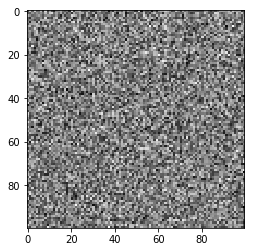

(100, 'epochs')


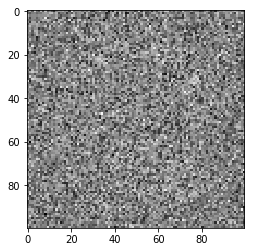

(200, 'epochs')


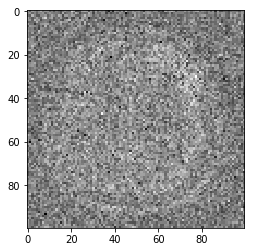

(300, 'epochs')


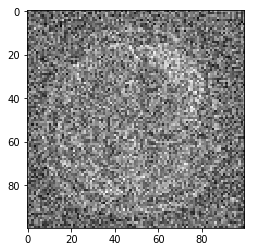

(400, 'epochs')


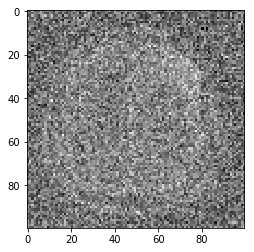

(500, 'epochs')


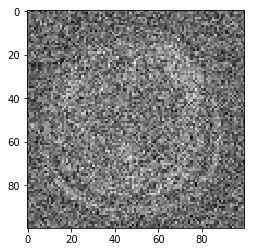

(600, 'epochs')


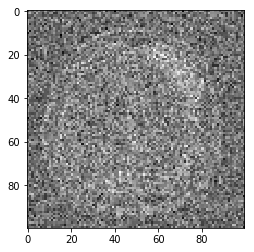

(700, 'epochs')


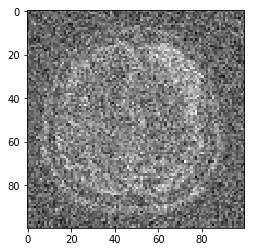

(800, 'epochs')


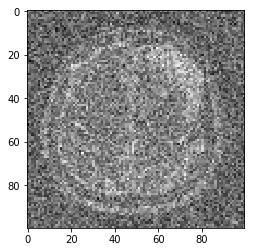

(900, 'epochs')


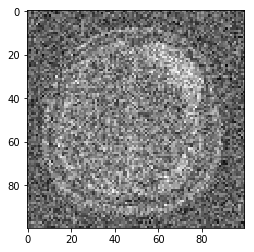

(1000, 'epochs')


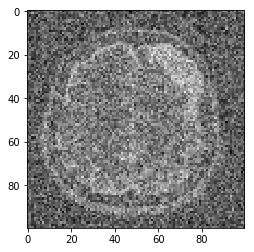

(1100, 'epochs')


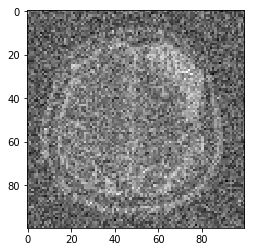

(1200, 'epochs')


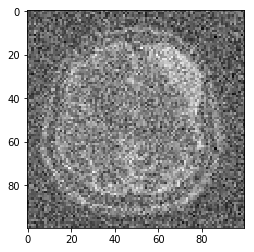

(1300, 'epochs')


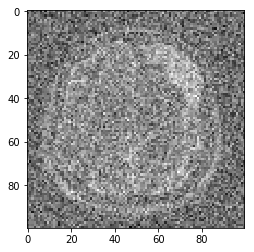

(1400, 'epochs')


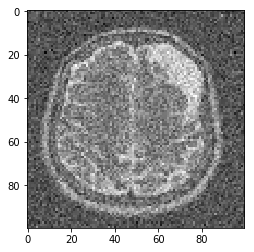

(1500, 'epochs')


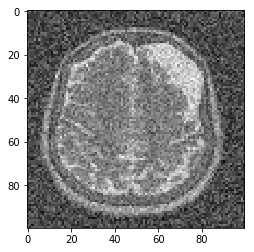

(1600, 'epochs')


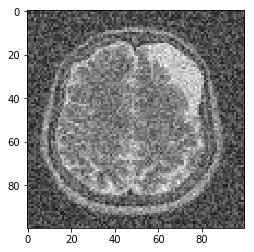

(1700, 'epochs')


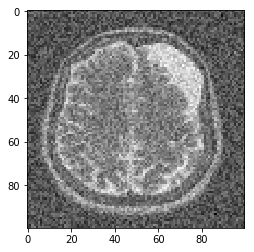

(1800, 'epochs')


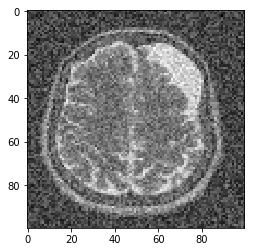

(1900, 'epochs')


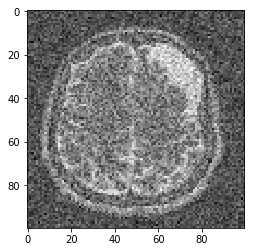

(2000, 'epochs')


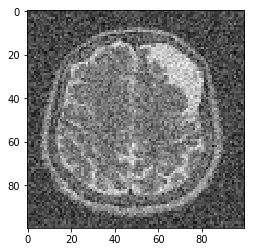

(2100, 'epochs')


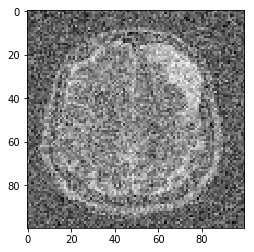

(2200, 'epochs')


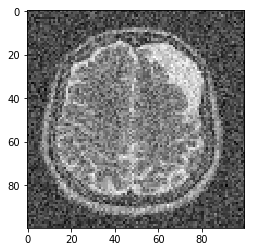

(2300, 'epochs')


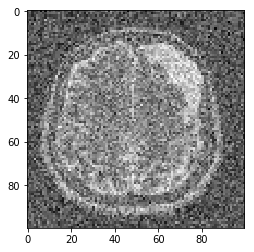

(2400, 'epochs')


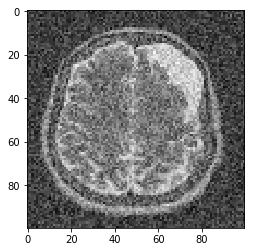

(2500, 'epochs')


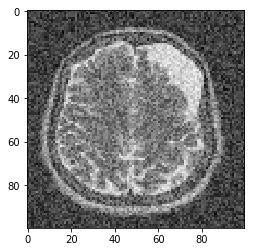

(2600, 'epochs')


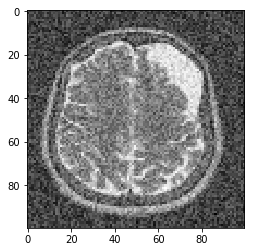

(2700, 'epochs')


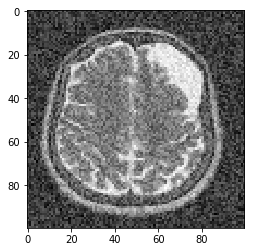

(2800, 'epochs')


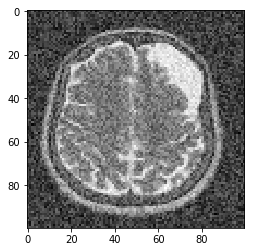

(2900, 'epochs')


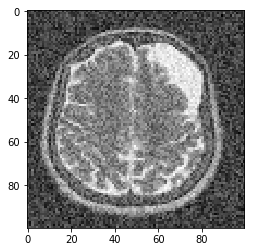

In [0]:
import sys
import datetime
import imageio
import PIL
from cStringIO import StringIO
gif_imgs = []

for epoch in range(3000):
    for i, (images) in enumerate(data_loader):
        # Build dataset
        batch_size = images.size(0)
        for i in range(10):
          images = to_var(images.view(batch_size, -1))
        
          
          real_labels = to_var(torch.ones(batch_size)) 
          fake_labels = to_var(torch.zeros(batch_size))
        
          outputs = D(images)
          d_loss_real = criterion(outputs, real_labels)
          real_score = outputs
        
          z = to_var(torch.randn(batch_size, 1))
          fake_images = G(z)
          outputs = D(fake_images)
          d_loss_fake = criterion(outputs, fake_labels)
          fake_score = outputs
        
          d_loss = d_loss_real + d_loss_fake
          D.zero_grad()
          d_loss.backward()
          d_optimizer.step()
        
        
        
        z = to_var(torch.randn(batch_size, 1))
        fake_images = G(z)
        outputs = D(fake_images)
        
        g_loss = criterion(outputs, real_labels)
        
        # Backprop + Optimize
        D.zero_grad()
        G.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        
    if (epoch%100==0):
      print(epoch,'epochs')
      z = to_var(torch.randn(batch_size, 1))
      imgs = G(z)
      pic = imgs[4].cpu().detach().numpy()
      pic = pic.reshape([100,100])
      
      plt.imshow(pic,cmap='gray')
      buffer_ = StringIO()
      plt.savefig(buffer_, format = "png")
      buffer_.seek(0)
      image = PIL.Image.open(buffer_)
      ar = np.asarray(image)
      buffer_.close()
      gif_imgs.append(ar)
      plt.show()
      
output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')    
imageio.mimsave(output_file, gif_imgs, duration=0.5)      
   